In [1]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

# Filter for data analysts
df_da = df[df['job_title_short']=='Data Analyst'].copy()

For this, let's use what we did in the section 12_exercice_trending_skills

In [2]:
df_exploded = df_da.explode('job_skills')

# recuperer les mois et les numeros de mois
df_exploded['job_posted_month'] = df_exploded['job_posted_date'].dt.strftime('%B') #optional
df_exploded['month_number'] = pd.to_datetime(df_exploded['job_posted_month'], format='%B').dt.month

df_exploded = df_exploded[['month_number', 'job_skills']]
# Retrieve the top skills 
top_skills = df_exploded['job_skills'].value_counts().head(5).index
top_skills = top_skills.to_list()

df_exploded = df_exploded[df_exploded['job_skills'].isin(top_skills)]
pivot_table = df_exploded.pivot_table(index= 'month_number',
                                     columns='job_skills',
                                     aggfunc='size',
                                     fill_value=0
                                     )
pivot_table.reset_index(inplace=True)
pivot_table['job_posted_month'] = pd.to_datetime(pivot_table['month_number'], format='%m').dt.strftime('%B')
#pivot_table.sort_values(by='month_number', inplace=True)
pivot_table.set_index('job_posted_month',inplace=True)
pivot_table.drop(columns='month_number')

job_skills,excel,power bi,python,sql,tableau
job_posted_month,,,,,
January,8170,4285,6606,11336,5596
February,5772,3307,4751,7947,3936
March,5675,3176,4741,7868,4051
April,5496,3106,4557,7553,3776
May,4773,2695,4070,6617,3245
June,5724,3275,4707,7584,3812
July,5513,3350,4831,7687,3928
August,6482,3859,5576,8823,4533
September,4886,3118,4229,6829,3446


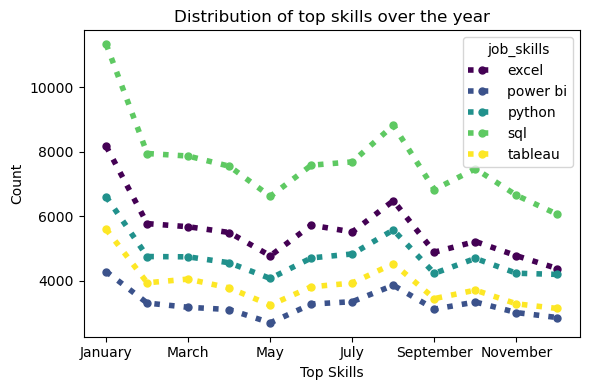

In [3]:
#Plotting
pivot_table.iloc[:,1:6].plot(kind='line',
                            linewidth=4,
                            linestyle=':',
                            colormap='viridis',
                            marker='o',
                            markersize=5,
                            figsize=(6,4)
                             )
plt.title('Distribution of top skills over the year')
plt.xlabel('Top Skills')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


There we will use what we did recently on the section 15_scatter_plot

In [4]:
df_exploded_2 = df_da.explode('job_skills')
skills_stat = df_exploded_2.groupby('job_skills').agg(
    skills_count=('job_skills', 'count'),  # Compte le nombre d'occurrences
    median_salary=('salary_year_avg', 'median')  # Calcule la médiane des salaires
).reset_index()
skills_stat.set_index('job_skills', inplace=True)

head_number=20

skills_stat = skills_stat.sort_values(by='skills_count', ascending=False).head(head_number)

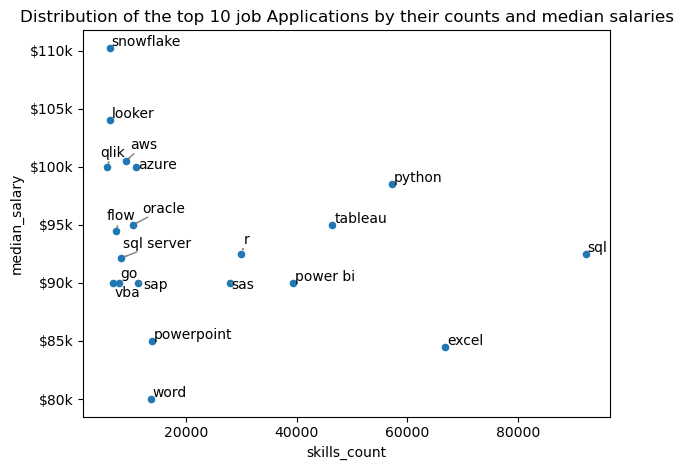

In [12]:
from adjustText import adjust_text 
from matplotlib.ticker import FuncFormatter

# formatting function to convert values ​​to thousands with a 'k'
def format_salary(value, _):
    return f'${value/1000:.0f}k'

skills_stat.plot(kind='scatter', x='skills_count', y='median_salary')
plt.title('Distribution of the top 10 job Applications by their counts and median salaries')
plt.tight_layout()

# Appliquer le formatage de l'axe des ordonnées
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_salary))

texts = []
for i in skills_stat.index:
    plotter = skills_stat.loc[i]
    texts.append(plt.text(plotter['skills_count'],plotter['median_salary'], i))

adjust_text(texts, arrowprops=dict(arrowstyle ='->' , color = 'gray', lw=1))
plt.show()